In [ ]:
%pip install numpy matplotlib oasis-deconv tqdm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from oasis.functions import deconvolve, gen_data
from tqdm import tqdm

c:\Users\delgr\Projects\intro-to-calcium-imaging-analysis-in-python-2025\.pixi\envs\default\Lib\site-packages\oasis\functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


Text(0.5, 1.0, 'Calcium Fluorescence Signal')

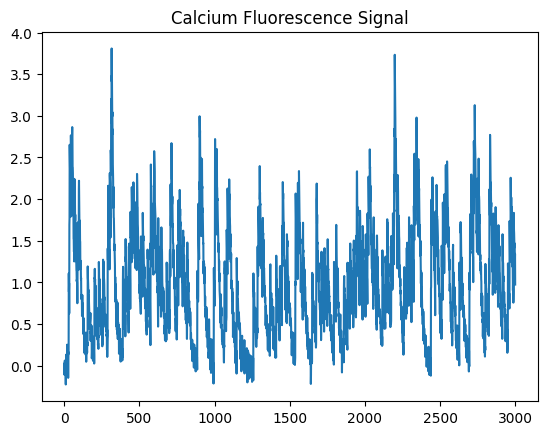

In [4]:
y1, c1, s1 = map(np.squeeze, gen_data(N=1, seed=5, sn=0.1, framerate=10))
plt.plot(y1);
plt.title("Calcium Fluorescence Signal")

## Comparing Fluorescence Traces to OASIS-Inferred Traces with Different `g` parameters

Most-similar plots mean best-fit.

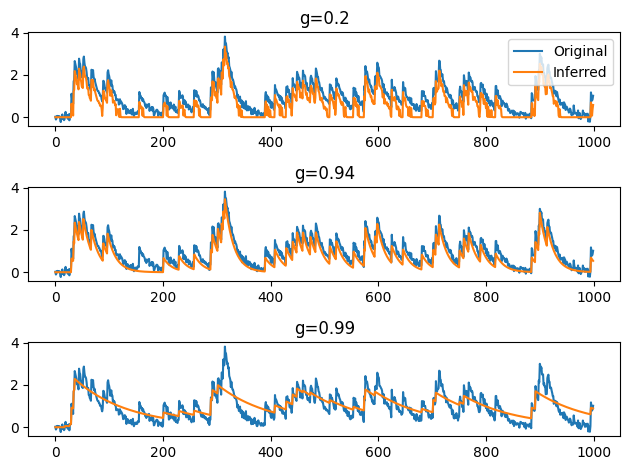

In [20]:
plt.subplot(3, 1, 1);
inferred_trace, estimated_spikes, estimated_baseline, g, _ = deconvolve(y1, g=(.15,))
plt.plot(y1[:1000], label='Original');
plt.plot(inferred_trace[:1000], label='Inferred')
plt.title("g=0.2")
plt.legend();


plt.subplot(3, 1, 2);
inferred_trace, estimated_spikes, estimated_baseline, g, _ = deconvolve(y1, g=(.94,))
plt.plot(y1[:1000], label='Original');
plt.plot(inferred_trace[:1000], label='Inferred')
plt.title("g=0.94")

plt.subplot(3, 1, 3);
inferred_trace, estimated_spikes, estimated_baseline, g, _ = deconvolve(y1, g=(.99,))
plt.plot(y1[:1000], label='Original');
plt.plot(inferred_trace[:1000], label='Inferred')
plt.title("g=0.99")
plt.tight_layout();

### Brute-Force Searching for the Best G Value

In [ ]:

gs, errors = [], []
for g in tqdm(np.arange(.1, .999, .002)):
    inferred_trace, estimated_spikes, estimated_baseline, g, _ = deconvolve(y1, g=(g,))
    error = np.sqrt(np.mean(np.square(inferred_trace - y1)))
    gs.append(g)
    errors.append(error)



100%|██████████| 450/450 [00:26<00:00, 17.05it/s] 


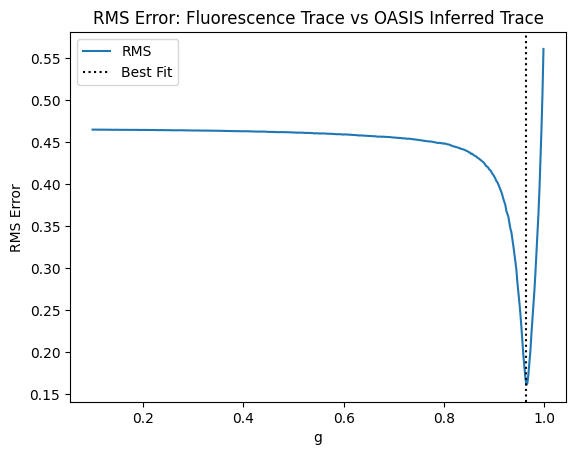

In [35]:
best_g = gs[np.argmin(errors)]

plt.plot(gs, errors, label='RMS');
plt.title('RMS Error: Fluorescence Trace vs OASIS Inferred Trace')
plt.ylabel('RMS Error');
plt.xlabel('g')
plt.axvline(best_g, color='black', linestyle='dotted', label='Best Fit')
plt.legend();

c:\Users\delgr\Projects\intro-to-calcium-imaging-analysis-in-python-2025\.pixi\envs\default\Lib\site-packages\oasis\functions.py:817: FutureWarning: Beginning in SciPy 1.17, multidimensional input will be treated as a batch, not `ravel`ed. To preserve the existing behavior and silence this warning, `ravel` arguments before passing them to `toeplitz`.
  A = scipy.linalg.toeplitz(xc[np.arange(lags)],


Text(0.5, 1.0, 'g=0.964')

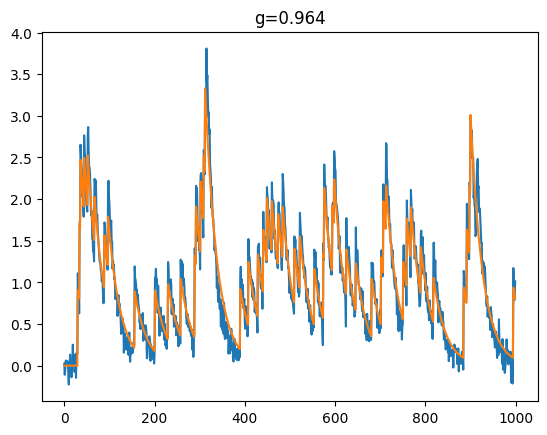

In [39]:
inferred_trace, estimated_spikes, estimated_baseline, g, _ = deconvolve(y1, g=(best_g,))
plt.plot(y1[:1000], label='Original');
plt.plot(inferred_trace[:1000], label='Inferred')
plt.title(f"g={round(best_g, 4)}")